In [1]:
import torch
from utils.training import train_accuracy
import matplotlib.pyplot as plt
from os import listdir
from tqdm import tqdm, trange
from data_loaders.mnist import Train, Val
import numpy as np

In [2]:
def rule(x):
    a = x[10:-4]
    try: return int(a)
    except: return 0
all_models = listdir("saved_models/Lenet/")
real_models = sorted([m for m in all_models if m.startswith("real")], key = rule)
quat_models = sorted([m for m in all_models if m.startswith("quat")], key = rule)
print(f"{real_models = }\n{quat_models = }")

real_models = ['real_unpruned.pth', 'real_prune1.pth', 'real_prune2.pth', 'real_prune3.pth', 'real_prune4.pth', 'real_prune5.pth', 'real_prune6.pth', 'real_prune7.pth', 'real_prune8.pth', 'real_prune9.pth', 'real_prune10.pth', 'real_prune11.pth', 'real_prune12.pth', 'real_prune13.pth', 'real_prune14.pth', 'real_prune15.pth', 'real_prune16.pth', 'real_prune17.pth', 'real_prune18.pth', 'real_prune19.pth', 'real_prune20.pth']
quat_models = ['quat_unpruned.pth', 'quat_prune1.pth', 'quat_prune2.pth', 'quat_prune3.pth', 'quat_prune4.pth', 'quat_prune5.pth', 'quat_prune6.pth', 'quat_prune7.pth', 'quat_prune8.pth', 'quat_prune9.pth', 'quat_prune10.pth', 'quat_prune11.pth', 'quat_prune12.pth', 'quat_prune13.pth', 'quat_prune14.pth', 'quat_prune15.pth', 'quat_prune16.pth', 'quat_prune17.pth', 'quat_prune18.pth', 'quat_prune19.pth', 'quat_prune20.pth']


In [3]:
training_generator = torch.utils.data.DataLoader(Train(), batch_size=50000, num_workers=4)
validation_generator = torch.utils.data.DataLoader(Val(), batch_size=10000, num_workers=4)
GPU = torch.device("cuda:0")

In [4]:
real_train_accs = []
real_test_accs = []
for model_name in tqdm(real_models, desc="Real models", unit="model"):
    model = torch.load(f"saved_models/Lenet/{model_name}")
    real_train_accs.append(train_accuracy(model, training_generator, GPU))
    real_test_accs.append(train_accuracy(model, validation_generator, GPU))

quat_train_accs = []
quat_test_accs = []
for model_name in tqdm(quat_models, desc="Quat models", unit="model"):
    model = torch.load(f"saved_models/Lenet/{model_name}")
    quat_train_accs.append(train_accuracy(model, training_generator, GPU))
    quat_test_accs.append(train_accuracy(model, validation_generator, GPU))

Quat models: 100%|██████████| 21/21 [00:18<00:00,  1.13model/s]


In [8]:
def xs(n, t):
    if t=="real":
        return 1/np.array([100*0.75**i for i in range(n)])
    elif t=="quat":
        return 1/np.array([25*0.75**i for i in range(n)])

In [6]:
print(xs(len(real_test_accs), "real"))
print(real_test_accs)

[100.0, 75.0, 56.25, 42.1875, 31.640625, 23.73046875, 17.7978515625, 13.348388671875, 10.01129150390625, 7.5084686279296875, 5.631351470947266, 4.223513603210449, 3.167635202407837, 2.3757264018058777, 1.7817948013544083, 1.3363461010158062, 1.0022595757618546, 0.751694681821391, 0.5637710113660432, 0.42282825852453243, 0.3171211938933993]
[98.22, 98.05, 98.11, 98.15, 98.08, 97.83, 97.61, 97.49, 97.14, 96.67999999999999, 95.93, 95.58, 95.53, 94.65, 94.02000000000001, 93.51, 85.47, 79.14, 64.74, 46.58, 36.67]


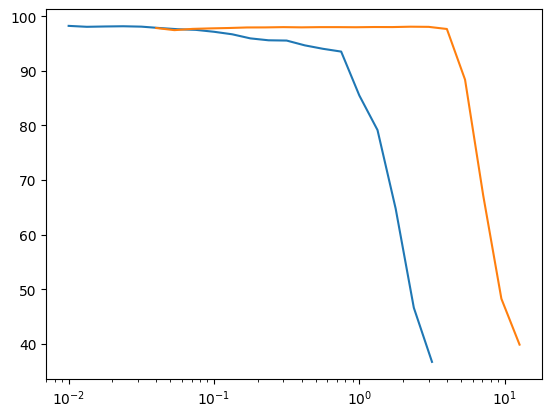

In [9]:
# plt.plot(real_train_accs, label="Real train acc")
plt.plot(xs(len(real_test_accs), "real"), real_test_accs, label="Real test acc")
# plt.plot(xs(quat_train_accs,) label="Quat train acc")
plt.plot(xs(len(quat_test_accs), "quat"), quat_test_accs, label="Quat test acc")

plt.xscale("log")

# plt.plot(real_train_accs, "k*-", label="Real train acc")
# plt.plot(real_test_accs, "k*-", label="Real test acc")